# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `Credit_card`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [162]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Loan_Modelling.csv")
df = data.copy()

## Data Overview

In [4]:
# check the  first and last  rows of the data
pd.concat([df.head(5), df.tail(5)])

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


* The dataset has been loaded properly:
Dataset consists of several columns displaying the various personal customer attributes
* All columns are numerical in nature

In [5]:
# check the shape of the dataset
print(
    "There are {} rows and {} columns in the loan data.".format(df.shape[0], df.shape[1])
    )

There are 5000 rows and 14 columns in the loan data.


* There are 5000 rows and 14 columns in the loan data.

In [6]:
# check the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All variables are numericals contains of 13 columns as integer and one column is float type.
* All the columns have 785 observations, which means none of the columns has null values.

In [7]:
# Checking the Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The average age of our customers is 45, with the youngest being 23 and the oldest 67.
* The majority of customers earn less than 100,000 dollars, with an average income of 73,000 dollars.
* Many customers hold advanced degrees or work in professional fields.
* About 50% of customers don't have a mortgage, securities account, or other credit cards. The average mortgage value is approximately 56,000 dollars. Its distribution is heavily right skewed.
* Most customers declined the personal loans offered in the last campaign.
* The maximum family size among customers is 4.
Average monthly spending on credit cards ranges from zero to $10,000.
* The Zip codes should not be treated as an integer value as it reflects location - Requires data pre-processing.
* The min Experience is -3 years which does not seem reasonable, hence requires a closer look.




## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [8]:
# edit column name
df.columns = df.columns.str.replace("CreditCard", "Credit_card")
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'Credit_card'],
      dtype='object')

In [9]:
df["ID"].nunique()

5000

* There are 5000 unique IDs serving as identifiers, and they do not have any relationship to whether a customer will obtain a personal loan or not.
* So we will drop this column id.

In [10]:
# drop the ID column from the data
df.drop("ID", axis = 1, inplace = True)

In [11]:
# To check missing values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
Credit_card           0
dtype: int64

* There is null value in the dataset.

In [12]:
# To check duplicate values
df.duplicated().sum()

0

* There are no duplicate values in the data.

### Checking for Anomalous Values

In [13]:
# Checking the unique values in the Experience
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [14]:
df[df["Experience"] <0]["Experience"].unique()

array([-1, -2, -3])

* There are anomalous values with negative values in the Experience (-1, -2 and -3). Probabley these negative signs here are data input errors, so we will replace them with positive signs.

In [15]:
# Correcting the anomalous experience values
df["Experience"].replace(-1, 1, inplace = True)
df["Experience"].replace(-2, 2, inplace = True)
df["Experience"].replace(-3, 3, inplace = True)

# Check if there is no negative number
df[df["Experience"] <0]["Experience"].unique()

array([], dtype=int64)

* No more negative values in the variable Experience

In [16]:
# Checking the unique values in the Education
df["Education"].unique()

array([1, 2, 3])

In [17]:
# Replacing values in Education with meaningful strings namely 1: Undergrad; 2: Graduate 3: Advanced/Professio
df["Education"].replace(1, "Undergraduate", inplace = True)
df["Education"].replace(2, "Graduate", inplace = True)
df["Education"].replace(3, "Professional", inplace = True)
df["Education"].unique()

array(['Undergraduate', 'Graduate', 'Professional'], dtype=object)

### Feature engineering

In [18]:
# checking the number of uniques in the zip code
df["ZIPCode"].nunique()

467

In [19]:
# count the unique values of zipcode
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
      df["ZIPCode"].str[0:2].nunique()
      )

Number of unique values if we take first two digits of ZIPCode:  7


In [20]:
# extract the zipcode based on the two first digits
df["ZIPCode"] = df["ZIPCode"].str[0:2]
df["ZIPCode"] = df["ZIPCode"].astype("category")
df["ZIPCode"].value_counts(normalize = True)

94    0.2944
92    0.1976
95    0.1630
90    0.1406
91    0.1130
93    0.0834
96    0.0080
Name: ZIPCode, dtype: float64

* In the dataset, there are 7 distinct neighborhoods, and the majority of customers reside in the neighborhood with the ZIP code 94.

In [21]:
# Converting the data type of categorical features to 'category'
cat_col = ["Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "Credit_card",
    "ZIPCode",]

df[cat_col] = df[cat_col].astype("category")

In [22]:
# To check updated data types in the dataset
df.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
Credit_card           category
dtype: object

* We have converted columns with categorial nature into "category" data type so that we assign them dummy values in the model build.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Answers**:


1.   The distribution is highly right-skewed, featuring a notable number of outliers. The plot illustrates that 75% of customers either have no mortgage or possess a mortgage size of less than 100k.
2.   1470 customers have credit cards.
3.   Personal_loan have relatively strong correlation with Income, CCAvg and CD_Account.
4.   There is no significant difference in customers' interest in purchasing a loan with their age, indicating that age may not strongly influence loan decisions.
5. customers holding a Professional degree are more likely to opt for personal loans with the bank.





### Univariate Analysis

In [23]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

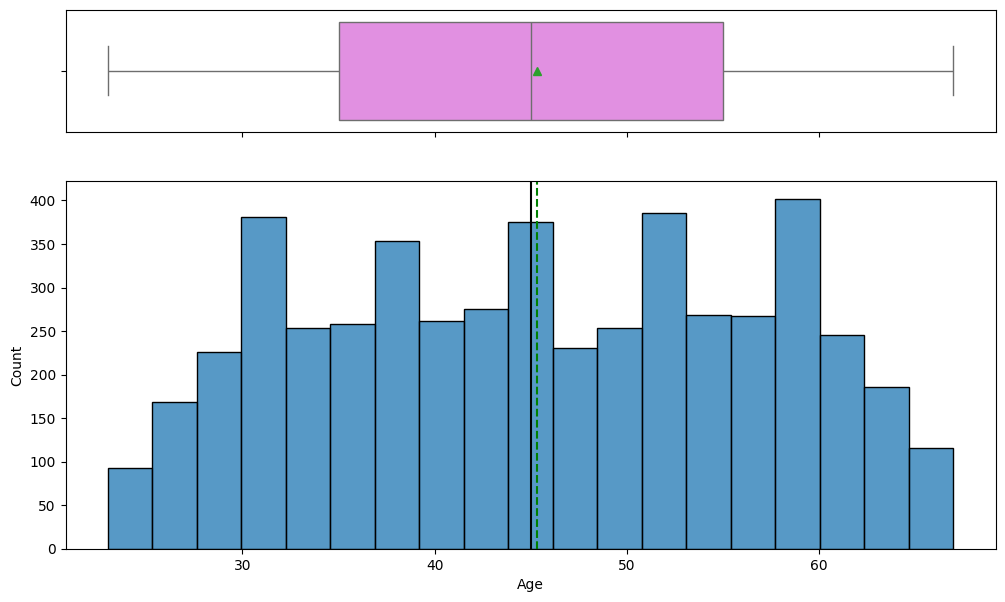

In [25]:
histogram_boxplot(df, "Age")

* It is observed that mean and median age of customers is about 45 while 50% of customers are between about 35 and 55. There is almost no skewness in the Age of cusomters.

#### Observations on Experience

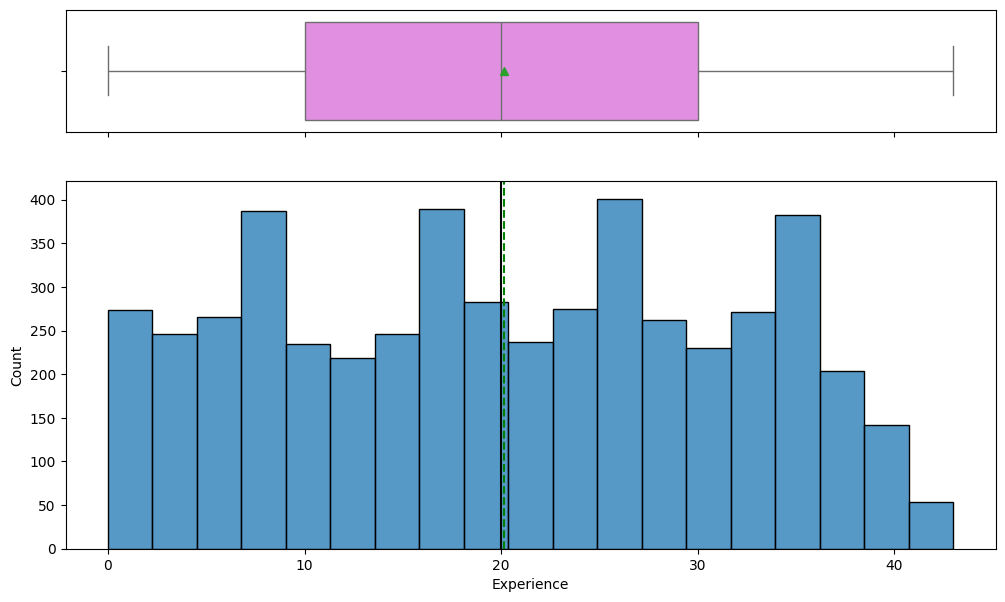

In [26]:
histogram_boxplot(df, "Experience")

* It is observed that mean and median Experience of customers is about 20 years while 50% customers have Experience of between 10 and 30 years.
* There are customers with no experience, while on the other side, there are a few customers with more than 40 years of experience.
* There is almost no skewness in the Experience of cusomters.

#### Observations on Income

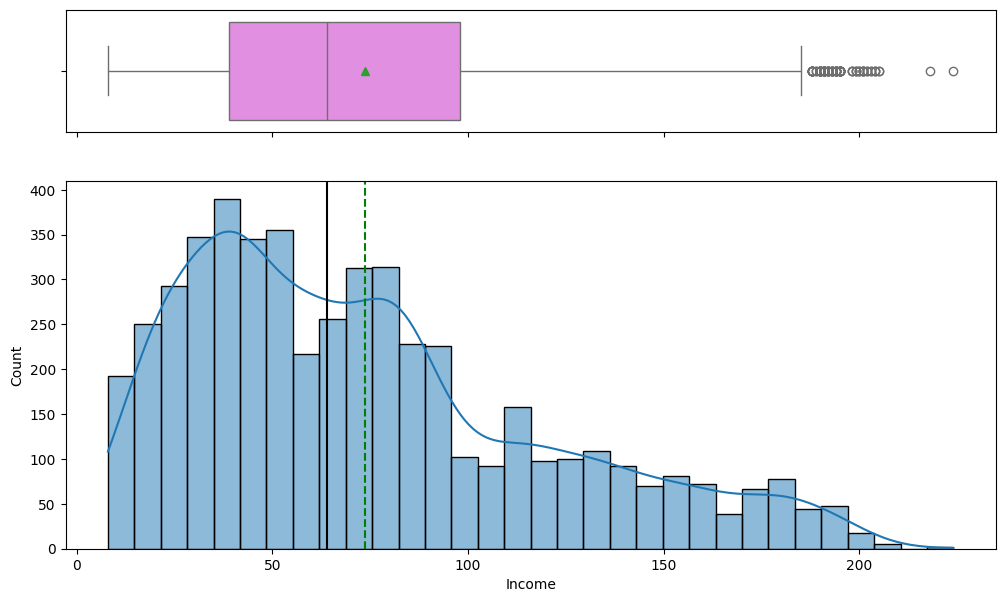

In [27]:
# Checking count of Income in a histogram box plots
histogram_boxplot(df, "Income", kde =True)

* The income distribution is right-skewed.
* 50 percent of customers have income equal to or less than 64 thousand dollars, and only 25% of them have income higher than 98 thousand dollars.

#### Observations on CCAvg

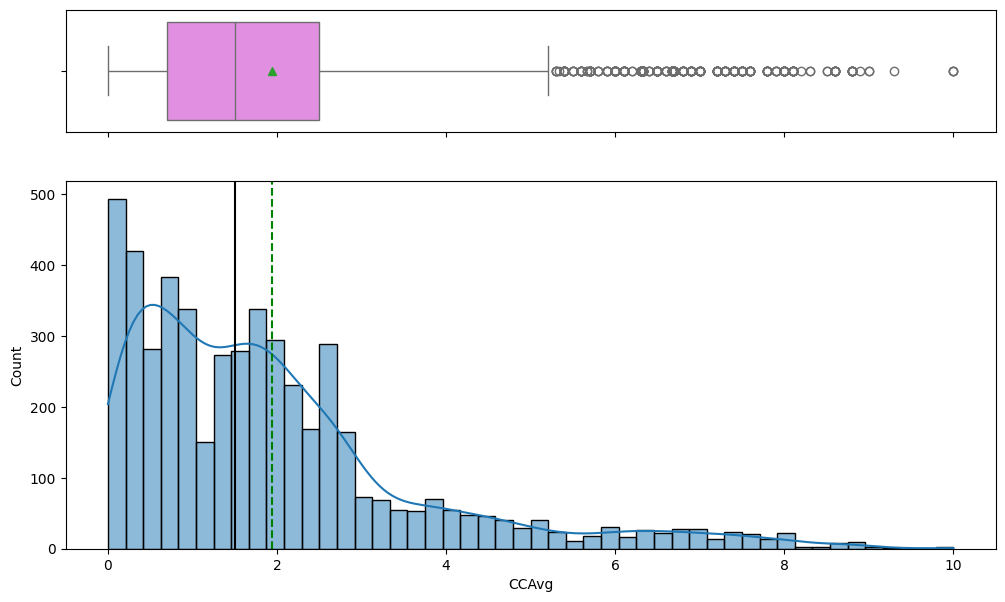

In [28]:
# Checking count of CCAvg in a histogram box plots
histogram_boxplot(df, "CCAvg", kde= True)

* It is observed that CCavg is highly right-skewed with outliers.
* 75% percent of customers have, on average, spent 2.5 thousand dollars or less on credit cards per month.

#### Observations on Mortgage

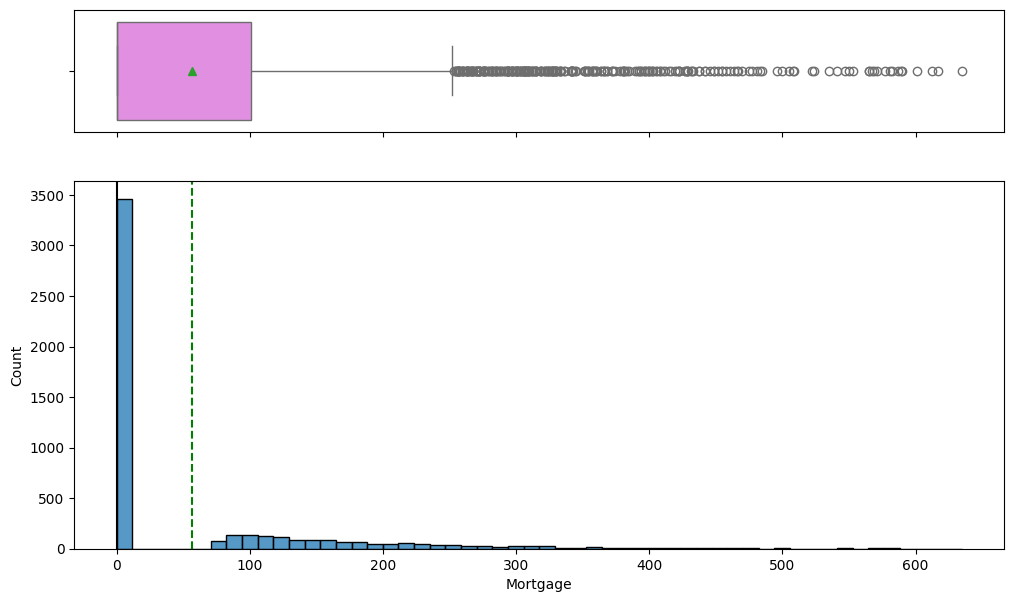

In [29]:
# Checking count of Mortgage in a histogram box plots
histogram_boxplot(df, "Mortgage")

* The distribution of mortgages is highly right-skewed with a lot of outliers.
* 50 percent of customers do not have a house mortgage.
* The minimum mortgage size is 100k, and the maximum mortgage value is 635k.



#### Observations on Family

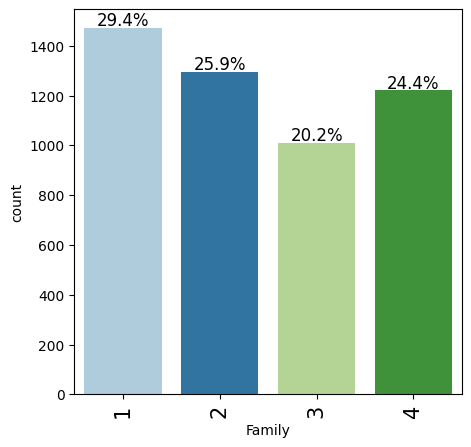

In [30]:
# Checking count of Family in a labeled bar plot
labeled_barplot(df, "Family", perc=True)

* It is observed that the majority of customers are single, followed by family sizes of 2, 4, and 3.

#### Observations on Education

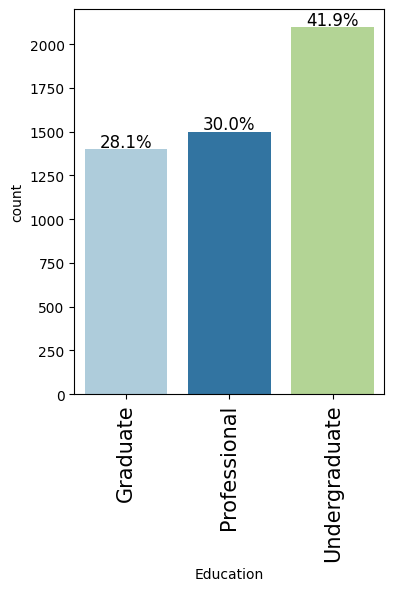

In [31]:
# Checking count of Education in a labeled bar plot
labeled_barplot(df, "Education", perc=True)

* It is observed that individuals with undergraduate degrees constitute the highest number of customers, followed by professionals as the second-highest group, while graduate degree holders are the least represented among customers.

#### Observations on Securities_Account

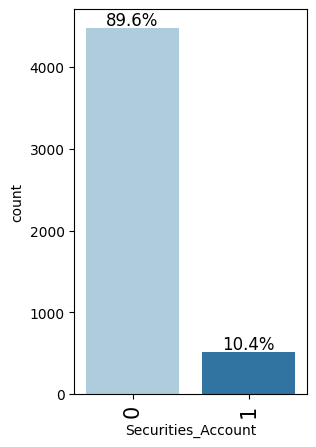

In [32]:
# Checking count of Education in a labeled bar plot
labeled_barplot(df, "Securities_Account", perc=True)

*
The majority, exceeding 89%, of customers do not possess a securities account with the bank.


#### Observations on CD_Account

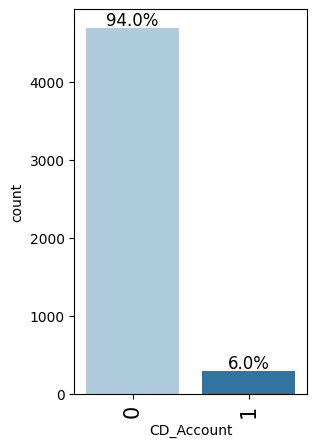

In [33]:
# Checking count of CD_Account in a labeled bar plot
labeled_barplot(df, "CD_Account", perc=True)

* 94% of customers do not have a certificate of deposit (CD) account with the bank.


#### Observations on Online

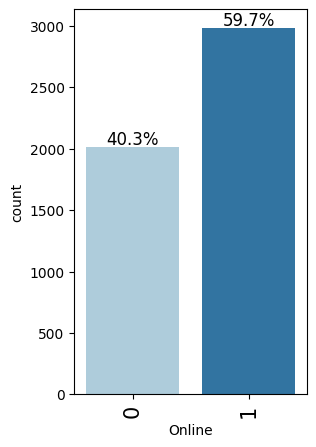

In [34]:
# Checking count of Online in a labeled bar plot
labeled_barplot(df, "Online", perc=True)

About 59% of customers use internet banking facilities, while the remaining 40% do not.

#### Observation on Credit_card

In [35]:
# check customers have credit cards
df["Credit_card"].value_counts()

0    3530
1    1470
Name: Credit_card, dtype: int64

* 1470 customers have credit cards.

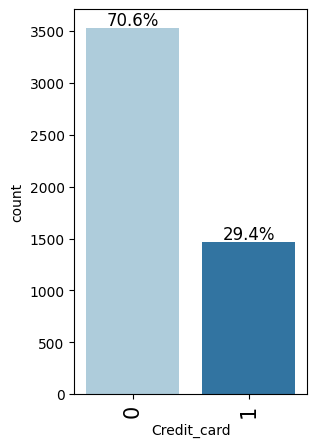

In [36]:
# Checking count of CreitCard in a labeled bar plot
labeled_barplot(df, "Credit_card", perc=True)

 * About 70% customers do not use a credit card issued by any other Bank.

#### Observation on ZIPCode

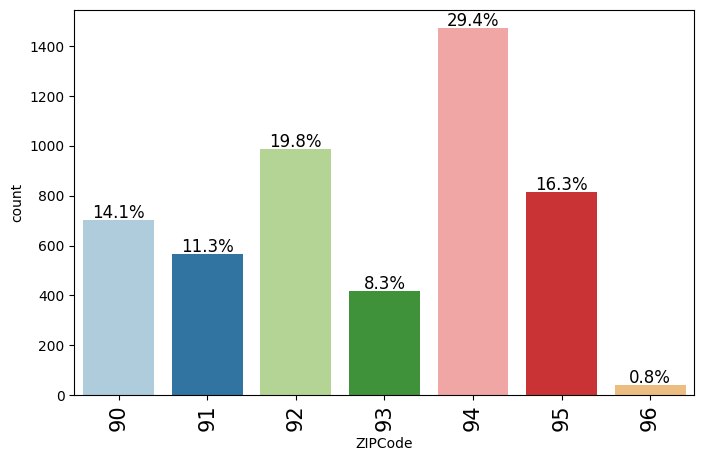

In [37]:
# Checking count of ZIPCode in a labeled bar plot
labeled_barplot(df, "ZIPCode", perc=True)

* The majority of customers reside in the ZIP code starting with 94, while the least number of customers live in the ZIP code starting with 96.

#### Observations on Personal_Loan

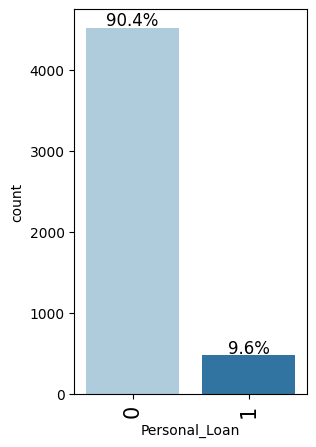

In [38]:
# Checking count of Personal loan in a labeled bar plot
labeled_barplot(df, "Personal_Loan", perc=True)

Nearly 90% of customers did not take up a personal loan in the last campaign while 9.6% of customers accepted personal loan offer.

### Bivariate Analysis

In [39]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [40]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

<Axes: >

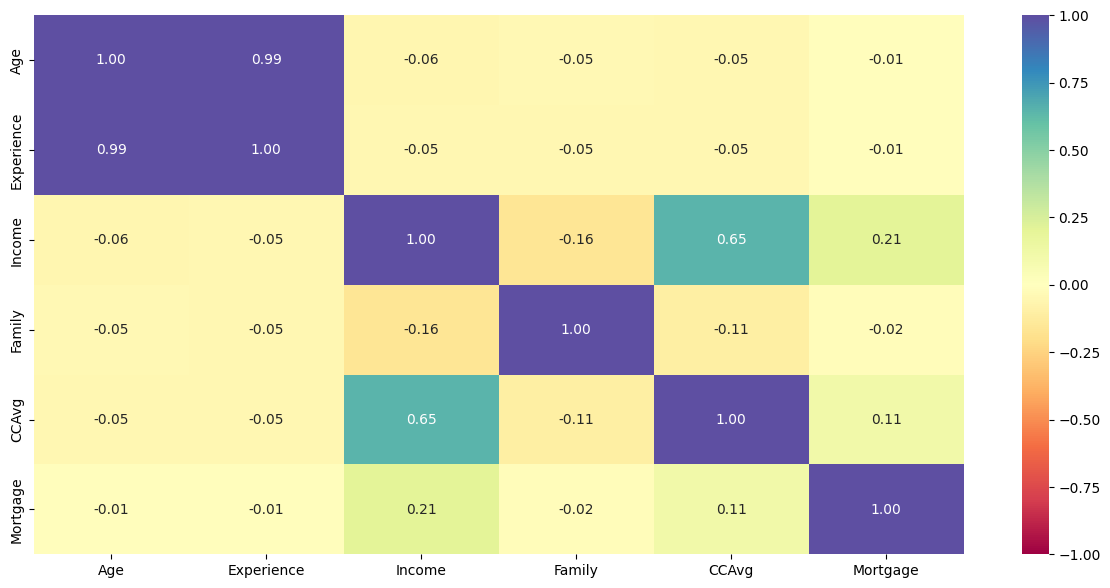

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(
    df.corr(), annot=True, vmin = -1, vmax =1, cmap ="Spectral", fmt = ".2f"
    )

* Experience and age are highly correlated, meaning that with increasing age, there is a corresponding increase in years of experience.
* Additionally, there is a strong correlation between CCAvg and income
* Personal_loan have relatively strong correlation with Income and CCAvg.

#### Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


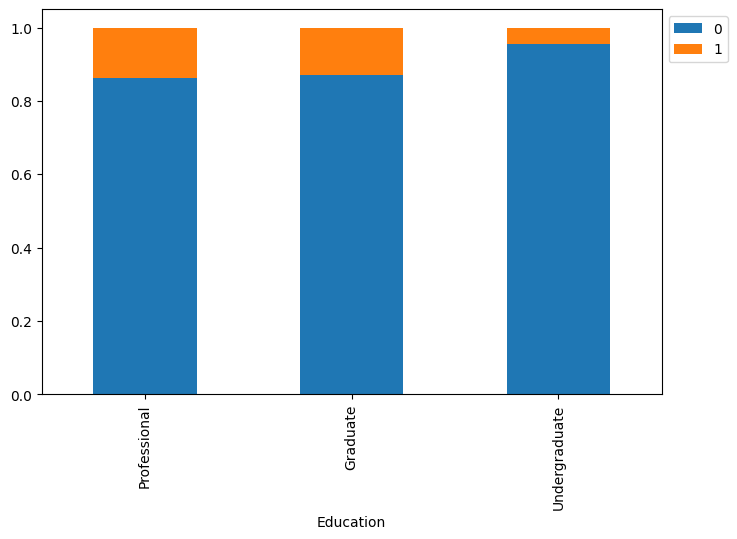

In [42]:
# Checking stacked barplot for Education and Personal_Loan
stacked_barplot(df, "Education", "Personal_Loan")

* customers with an undergraduate degree have the highest number of individuals who did not accept a personal loan.

#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


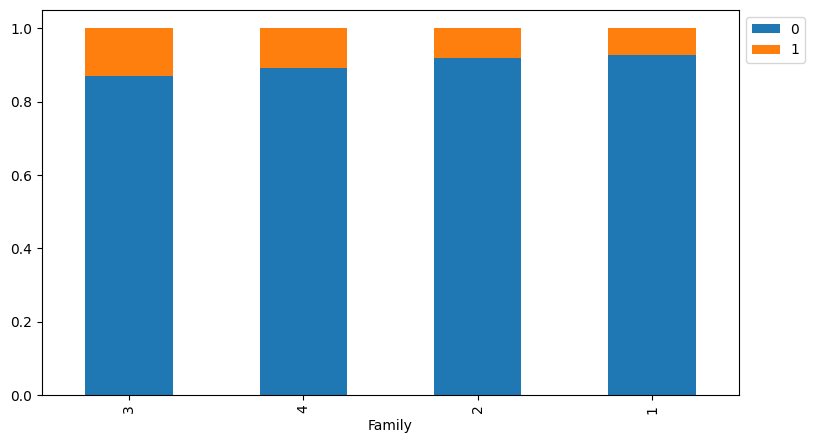

In [43]:
stacked_barplot(df, "Family", "Personal_Loan")

* It is observed that the majority of customers across all family sizes have not accepted a personal loan.
* Among them, single individuals have the highest number of customers declining personal loan offers.
* Conversely, customers with family sizes 3 and 4 relatively tend to accept personal loans.

#### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


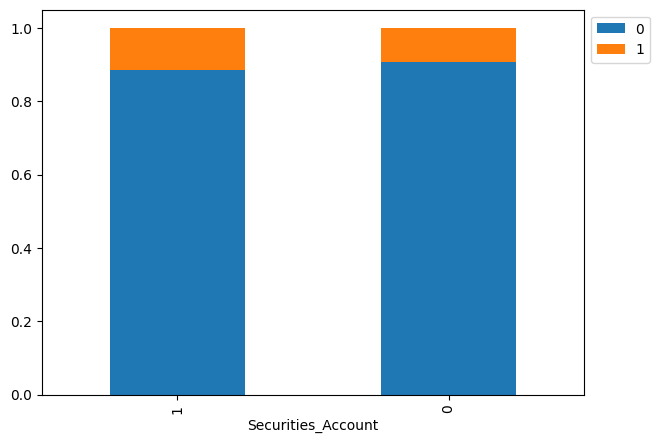

In [44]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

* The majority of customers, both with and without a security account, have not accepted any personal loans. Among them, customers without a security account slightly shows the highest number of individuals who declined a personal loan.

#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


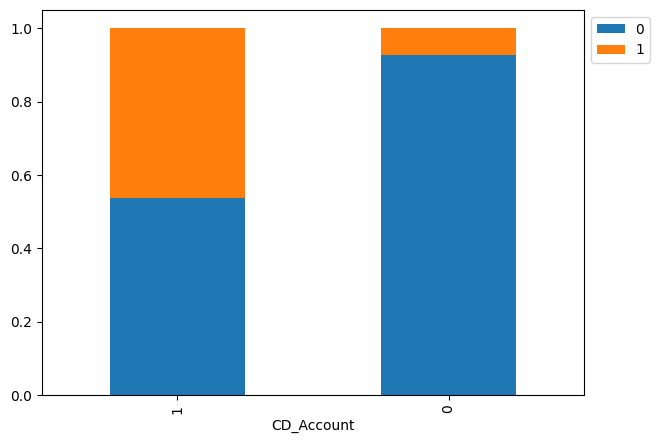

In [45]:
# Checking stacked barplot for Personal_Loan and CD_Account
stacked_barplot(df, "CD_Account", "Personal_Loan")

*
The majority of customers who do not have a CD account with the bank have not accepted a personal loan offer. However, nearly half of the customers with a CD account have accepted a personal loan


#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


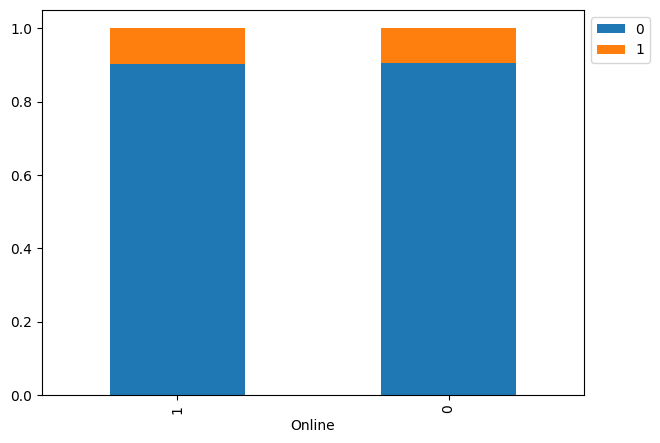

In [46]:
# Checking stacked barplot for Personal_Loan and Online
stacked_barplot(df, "Online", "Personal_Loan")

* The majority of customers, both with and without online banking facilities, have not accepted a personal loan. Among them, customers without online banking facilities have a higher number of individuals who declined a personal loan offer.

#### Personal_Loan vs Credit_card

Personal_Loan     0    1   All
Credit_card                   
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


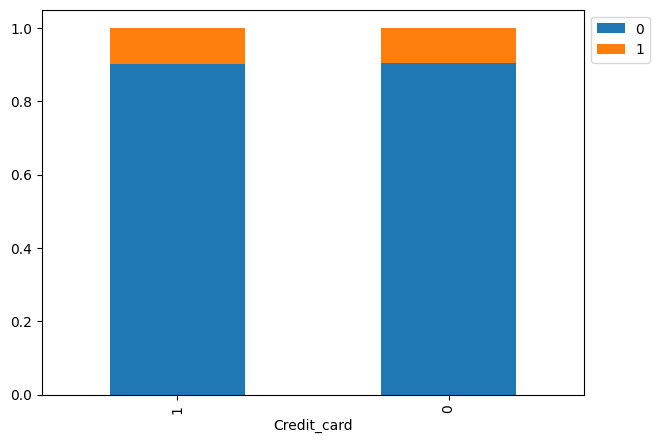

In [47]:
# Checking stacked barplot for Personal_Loan and Credit_card
stacked_barplot(df, "Credit_card", "Personal_Loan")

* Most customers, regardless of whether they have a Credit Card from another bank, have declined personal loan offers. Notably, those without a Credit Card from another bank show the highest number of individuals who declined such offers

#### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


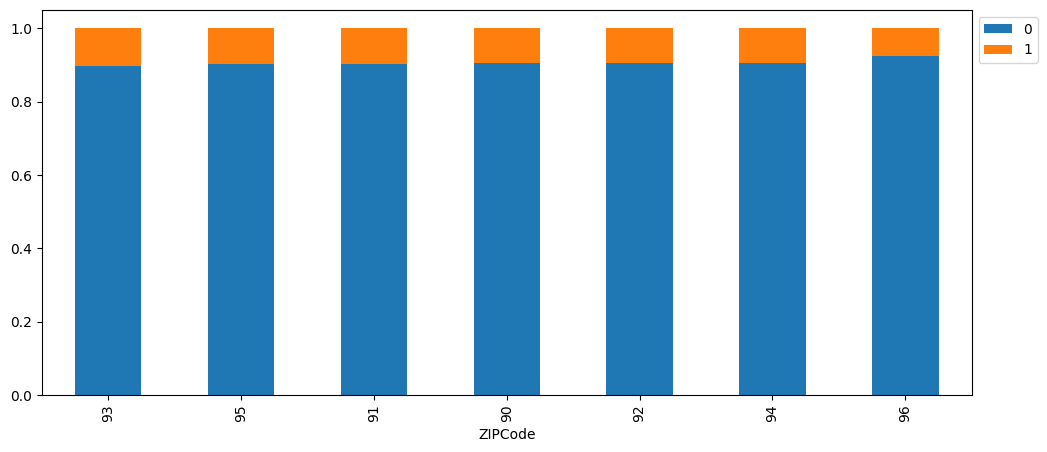

In [48]:
# Checking stacked barplot for Personal_Loan and ZIPCode
stacked_barplot(df, "ZIPCode", "Personal_Loan")

* The acceptance of personal loan offers does not significantly depend on a specific ZIP code, as the majority of customers across all ZIP codes have not accepted such offers.

#### Let's check how a customer's interest in purchasing a loan varies with their age

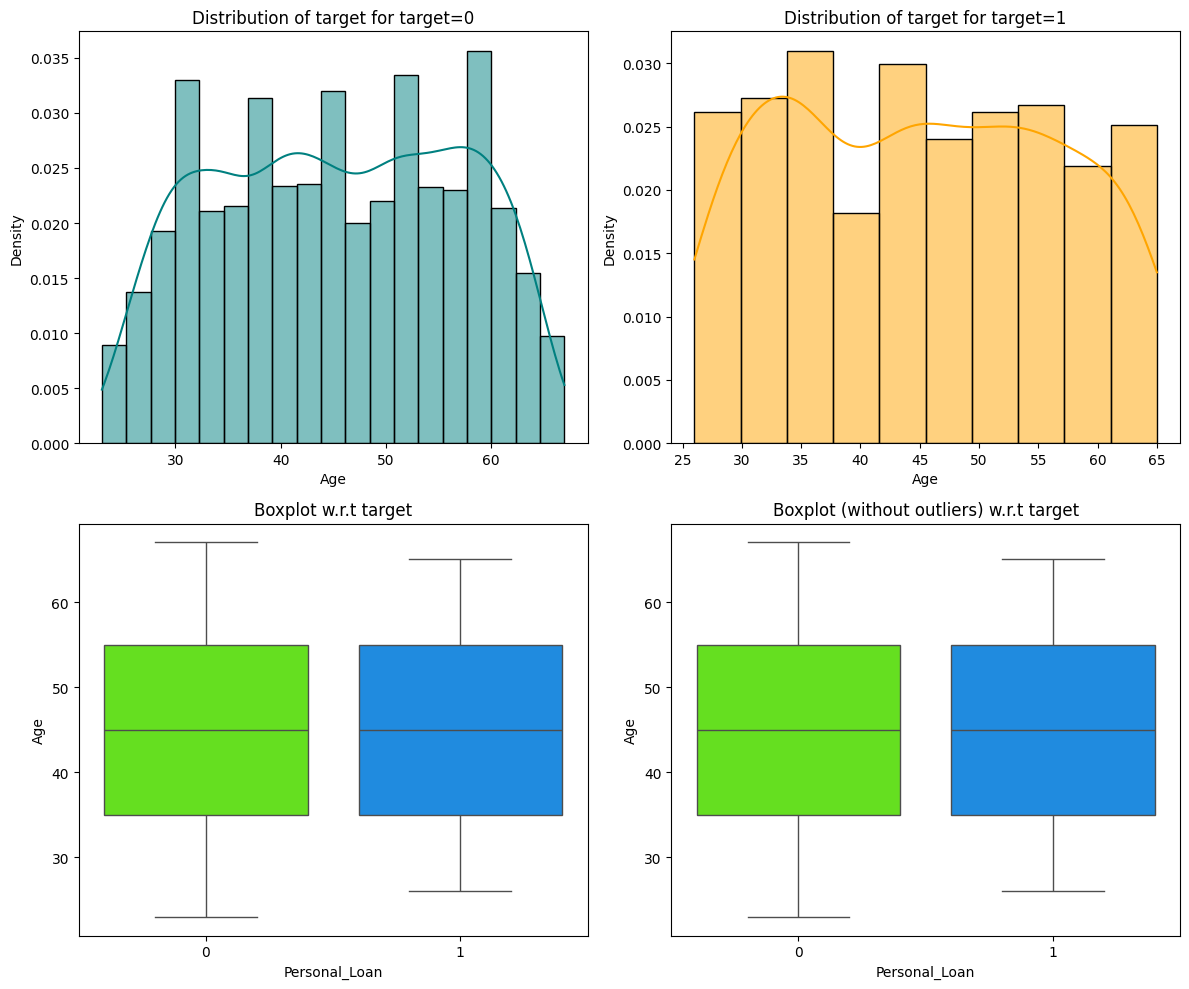

In [49]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

* Customers who either approved or declined a personal loan offer are predominantly between the ages of 35 to 55. There doesn't seem to be a significant difference in age concerning whether they accept the loan or not



#### Personal Loan vs Experience

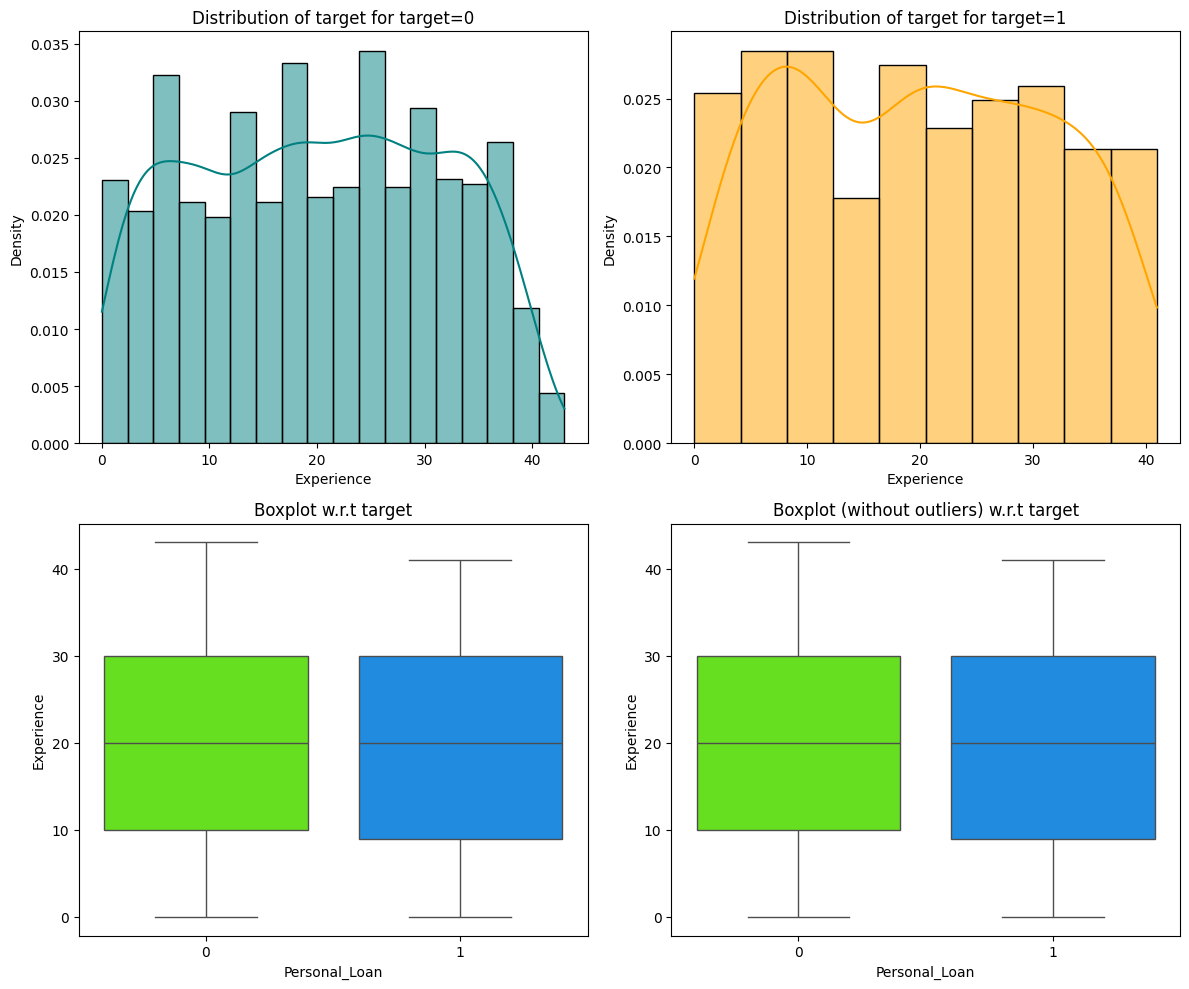

In [50]:
# Checking Distribution of Target for Personal_Loan and Experience
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

* Approximately 50% of customers who either approved or declined a personal loan offer have between 10 to 30 years of experience. The correlation between experience and the decision on a personal loan is minimal, and outliers do not significantly impact the conclusions.

#### Personal Loan vs Income

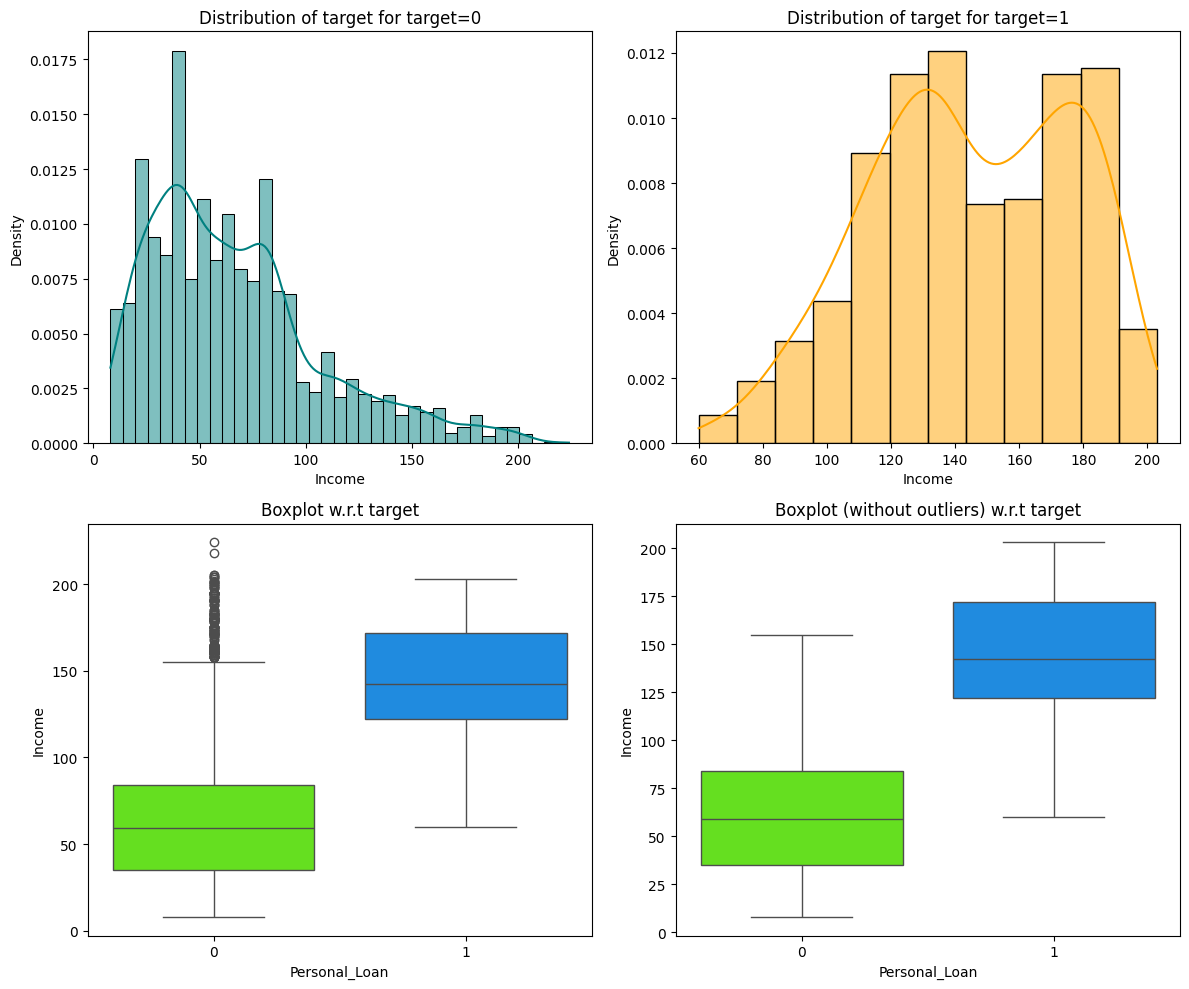

In [51]:
# Checking Distribution of Target for Personal_Loan and Income
distribution_plot_wrt_target(df, "Income", "Personal_Loan")

* The distribution of income for customers who accepted the loan is highly right-skewed, whereas those without a personal loan show a left-skewed distribution, indicating that people with lower incomes tend not to accept personal loans.
* 75 percent of customers who declined a personal loan offer primarily have incomes below 80k dollars. In contrast, 75% of customers who approved a personal loan have incomes mainly above 120k dollars.
* There is a correlation between income and the personal loan approval rate, increasing with higher income and vice versa.
* Outliers are not massively impactful on the conclusions.

#### Personal Loan vs CCAvg

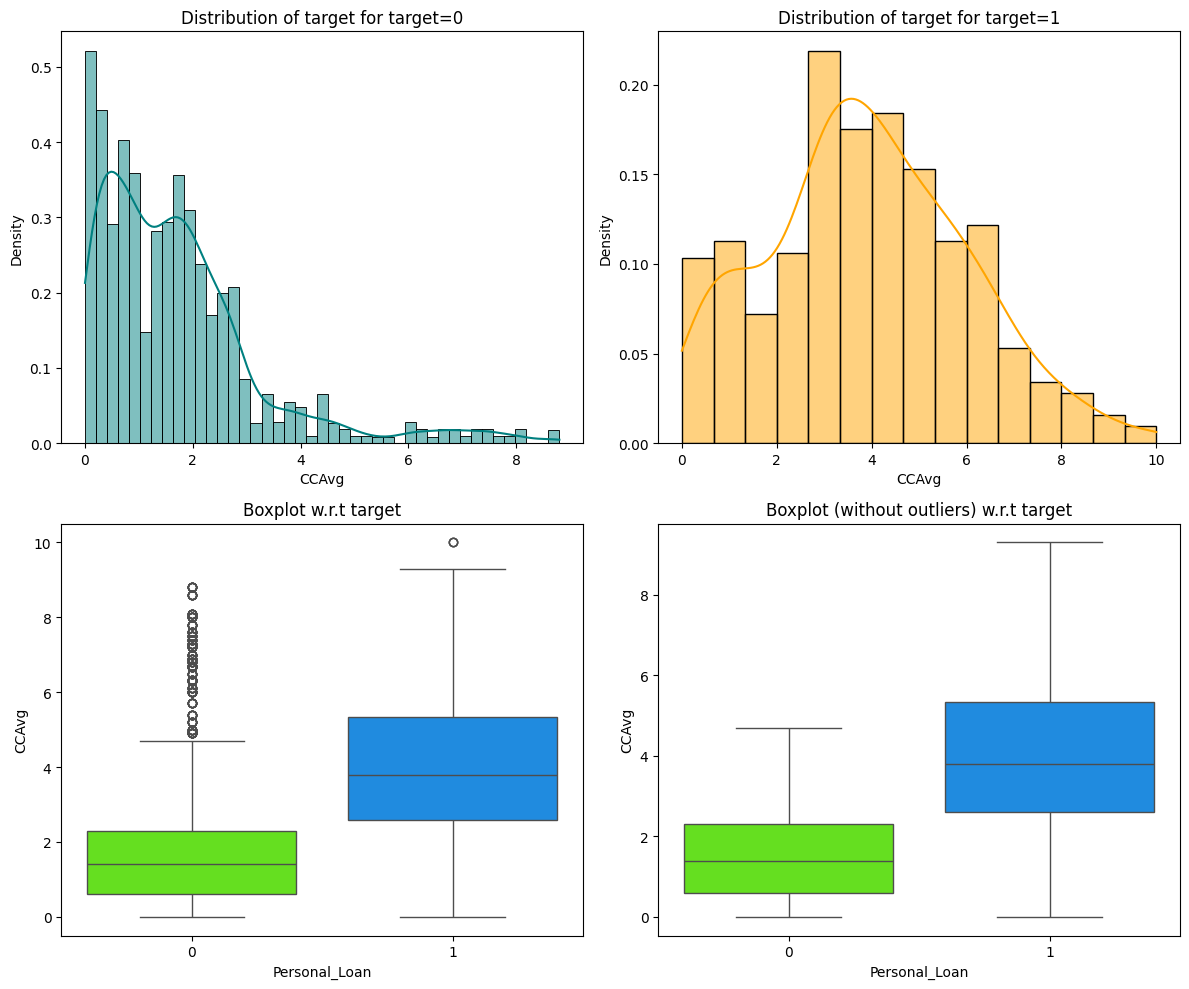

In [52]:
# Checking Distribution of Target for Personal_Loan and CCAvg
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

* In the majority of cases where customers declined a personal loan offer, their Average Credit Card usage was below 2100 dollars. Conversely, for most customers who approved a personal loan, their Average Credit Card usage ranged between approximately 2200 and 5000 dollars.
* A correlation exists between CCAvg and the approval rate for personal loans, indicating an increase with higher CCAvg and vice versa.
* Outliers do not have a siignificant impact on these observations.

## Data Preprocessing

### Outlier Detection

In [53]:
# To find the 25th percentile and 75th percentile.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# To find Inter Quantile Range
IQR = Q3 - Q1

# To find lower and upper bounds for all values
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [54]:
# To compute the percentage of outliers
((df.select_dtypes(include= np.number) < lower)
  | (df.select_dtypes(include = np.number) > upper)
).sum()/df.shape[0] *100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

* We will retain outliers in the dataset, as their presence does not constitute a high percentage of the data. This decision is based on the understanding that the outliers have a minimal impact on the overall distribution and analysis results.

### Data Preparation for Modeling

- The objective is to predict whether a liability customer will buy personal loans.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

In [55]:
# Separate independent and dependent variable
## as Experience can always be found with other variable
X = df.drop(["Experience", "Personal_Loan"], axis = 1)
y = df["Personal_Loan"]

In [56]:
# Get dummies on ZIPCode and Education
X = pd.get_dummies(
    data = X,
    columns = [
        "ZIPCode",
        "Education"],
    drop_first = True)
X.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Credit_card,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_Professional,Education_Undergraduate
0,25,49,4,1.6,0,1,0,0,0,1,0,0,0,0,0,0,1
1,45,34,3,1.5,0,1,0,0,0,0,0,0,0,0,0,0,1
2,39,11,1,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,35,100,1,2.7,0,0,0,0,0,0,0,0,1,0,0,0,0
4,35,45,4,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [104]:
print(f" independent dataset has {X.shape[0]} rows and {X.shape[1]} columns.")

 independent dataset has 5000 rows and 17 columns.


In [58]:
# Checking the data types
X.dtypes.value_counts()

uint8       8
int64       4
category    4
float64     1
dtype: int64

* There is no boolean or object data tyes, X dataset is ready to go.

In [59]:
# To split data in train and test sets with 30% ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 1,
    #stratify= y  # to ensure proportions are balanced
    )

In [113]:
# To get information about the shape and value counts of train data and test data
print(
    "Shape of Training set : ", X_train.shape,
    "Shape of test set : ", X_test.shape,
    sep = "\n",
    end = "\n\n")
print(
    "Percentage of classes in training set: \n",
    y_train.value_counts(normalize = True),
    end = "\n\n")

print("Percentage of classes in test set: \n",
      y_test.value_counts(normalize = True))


Shape of Training set : 
(3500, 17)
Shape of test set : 
(1500, 17)

Percentage of classes in training set: 
 0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

Percentage of classes in test set: 
 0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


*  We see that around 90% of observations belongs to class 0 (no personal loan) and about 10% observations belongs to class 1 (with personal loan). and this is preserved in the train and test sets.
The proportion of classes are already equal across two training and testing sets without using stratify parameter.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan -  resulting in Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - leading to a Loss of opportunity

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.


### Model Building

First, we create functions to calculate different metrics and confusion matrix.

* The **model_performance_classification_sklearn function** will be used to check the model performance of models.
* The **confusion_matrix_sklearn function** will be used to plot confusion matrix.

In [114]:
# To define a function to compute different metrics to check performance of a classification model built using sklearn library
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [115]:
# To define a function to compute confusion matrix to check performance of a classification model built using sklearn library
def confusion_matrix_sklearn(model, predictors, target, seg):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="").set(title='Confusion Matrix of {} Set'.format(seg))
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [116]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion = "gini", random_state = 1)

# To fit decision tree on train data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

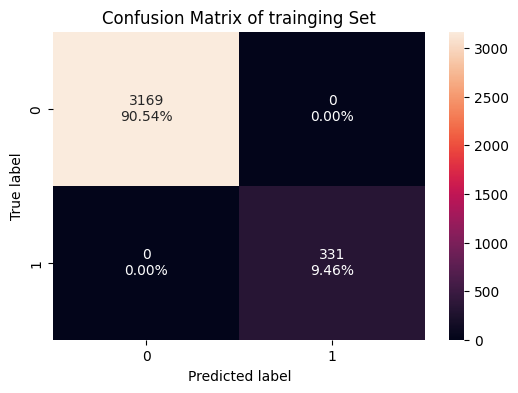

In [117]:
confusion_matrix_sklearn(model, X_train, y_train, seg = "trainging")

In [119]:
dt_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
dt_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* It is observed that we achieve a 100% performance in every metric. As expected, the decision tree appears to be overfitting the training set. We need to evaluate preforamnce on test data.

#### Visualizing the Decision Tree

In [120]:
# To create a list of independent variable strings
indep_vars = list(X_train.columns)
print(indep_vars)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'Credit_card', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


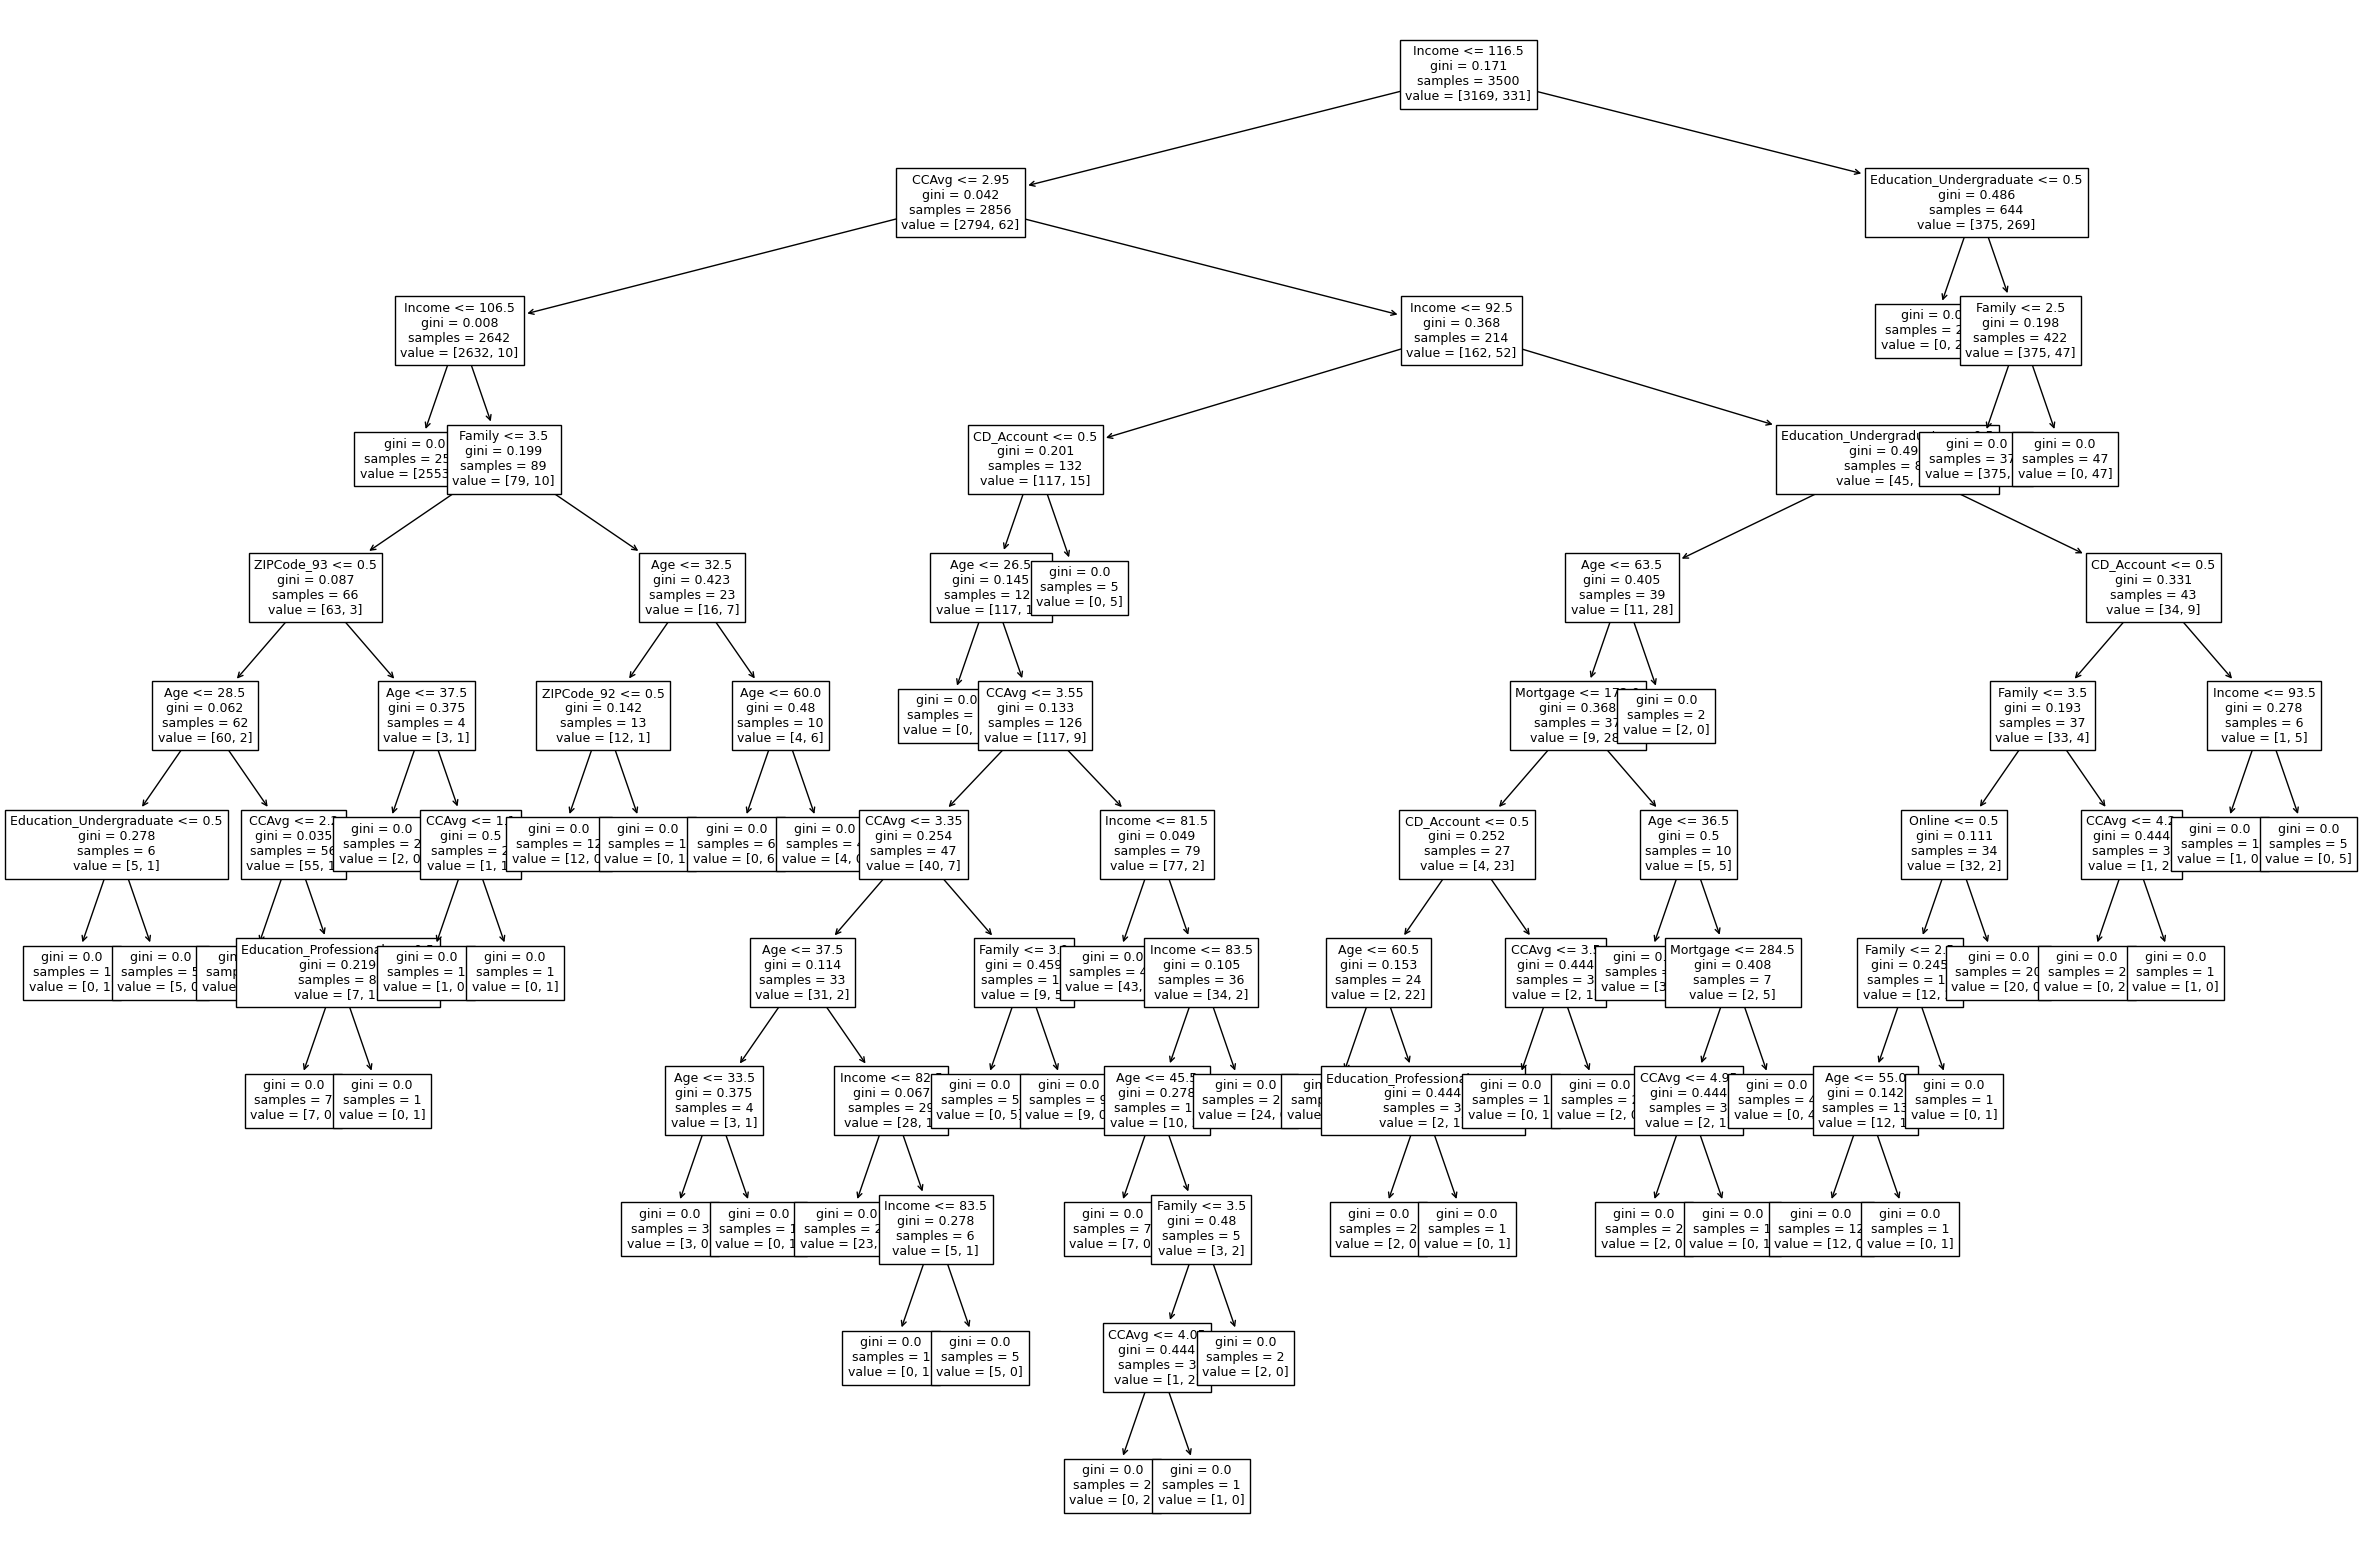

In [121]:
# To visualize the tree
plt.figure(figsize=(30, 20))
plot_out = tree.plot_tree(
    model,
    feature_names = indep_vars,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

# below code will add arrows to the decision tree split if they are missing
for o in plot_out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [122]:
# To print the rules of a decision tree
print(
    tree.export_text(
        decision_tree= model,
        feature_names= indep_vars,
        show_weights= True)
    )

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [123]:
# To calculate importance of features in the tree building meaning total reduction of the criterion brought by that feature.
## or the Gini importance
print(
    pd.DataFrame(model.feature_importances_,
                 columns= ["Important"],
                 index= X_train.columns
    ).sort_values(by = "Important",
                  ascending = False)
)

                         Important
Education_Undergraduate   0.403732
Income                    0.304761
Family                    0.161717
CCAvg                     0.053107
Age                       0.036035
CD_Account                0.025711
Mortgage                  0.005557
Education_Professional    0.005144
ZIPCode_92                0.003080
ZIPCode_93                0.000594
Online                    0.000561
Securities_Account        0.000000
ZIPCode_91                0.000000
ZIPCode_94                0.000000
ZIPCode_95                0.000000
ZIPCode_96                0.000000
Credit_card               0.000000


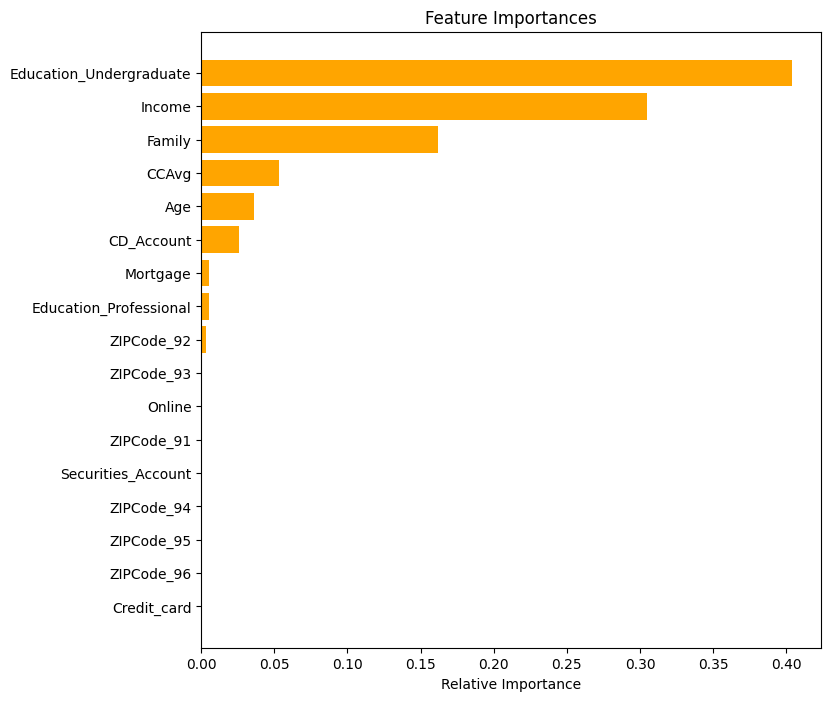

In [124]:
# To plot importance of features in the tree building meaning total reduction of the criterion brought by that feature.
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(
    range(len(indices)),
    importances[indices],
    color="orange",
    align="center")
plt.yticks(
    range(len(indices)),
    [indep_vars[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The analysis indicates that Education_Undergraduate, Income, and Family are the most influential features in determining customers' loan acceptance. These factors collectively contribute to around 80% accuracy in the model.

#### Checking model performance on test data

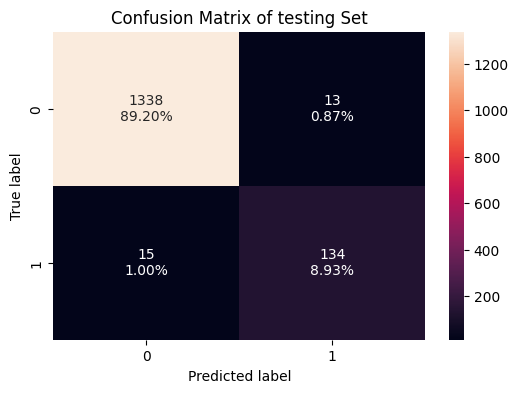

In [125]:
# To plot confusion matrix to measure accuracy of the model built by the train data against test data
confusion_matrix_sklearn(model, X_test, y_test, seg ="testing")

In [126]:
dt_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
dt_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


* The decision tree has recall score 0.90 on testing data.

In [73]:
y_train.value_counts(normalize=True)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

* We only have ~10% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here

### Model Performance Improvement

#### Decision Tree Pre-Pruning

* we will use Hyperparameter tuning using GridSearch to compute the optimum vlaues of hyperparameters.

In [127]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10]
}

# Type of scoring used to compare parameter combinations
acc_score = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    estimator = estimator,
    param_grid =  parameters,
    scoring = acc_score,
    cv= 5
    )
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# fit the best model on train data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

When we use Hyperparameter tuning using GridSearch, the optimum vlaues of hyperparameters computed as max depth is 6 and max leaf nodes is 10

**Checking performance on training data**

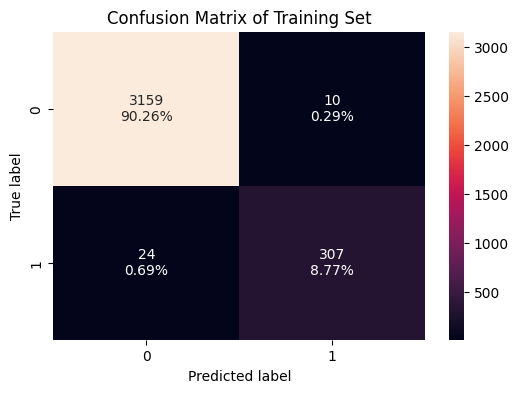

In [128]:
# create confusion matrix for train data
confusion_matrix_sklearn(estimator, X_train, y_train, seg='Training')

In [129]:
#check performance metrics on train data
dt_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
dt_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


**Visualizing the Decision Tree**

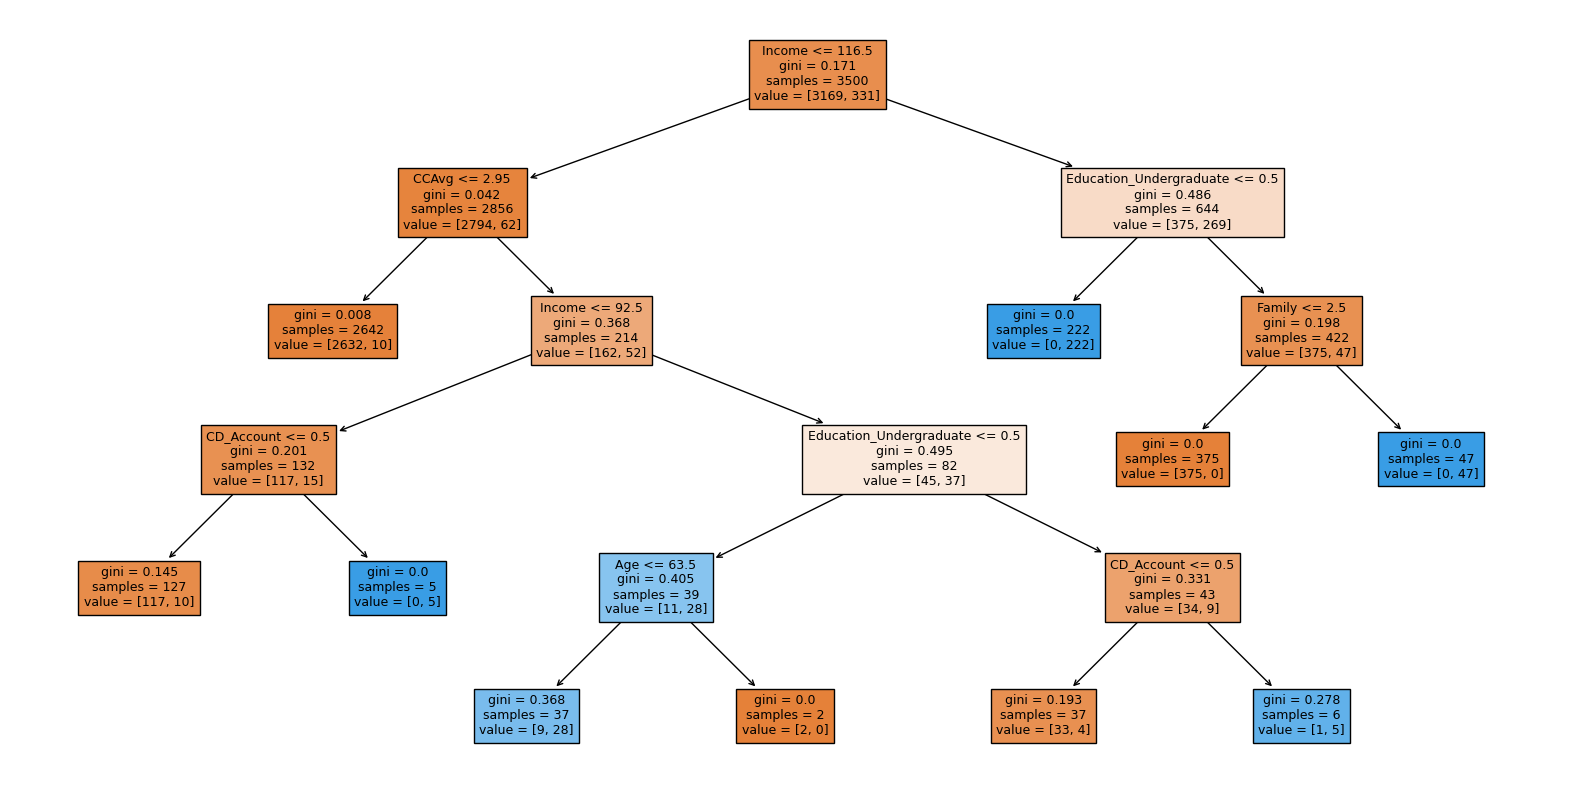

In [130]:
plt.figure(figsize = (20, 10))
out = tree.plot_tree(
    estimator,
    feature_names = indep_vars,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [131]:
# Text report showing the rules of a decision tree
print(
    tree.export_text(
    estimator,
    feature_names= indep_vars,
    show_weights = True)
)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [132]:
# identify the importtant featurs in the tree building

print(
    pd.DataFrame(
        estimator.feature_importances_,
        columns = ["Important"],
        index = X_train.columns
    ).sort_values(by = "Important", ascending = False)
)

                         Important
Education_Undergraduate   0.446191
Income                    0.327387
Family                    0.155083
CCAvg                     0.042061
CD_Account                0.025243
Age                       0.004035
Securities_Account        0.000000
Online                    0.000000
Mortgage                  0.000000
ZIPCode_91                0.000000
ZIPCode_92                0.000000
ZIPCode_93                0.000000
ZIPCode_94                0.000000
ZIPCode_95                0.000000
ZIPCode_96                0.000000
Education_Professional    0.000000
Credit_card               0.000000


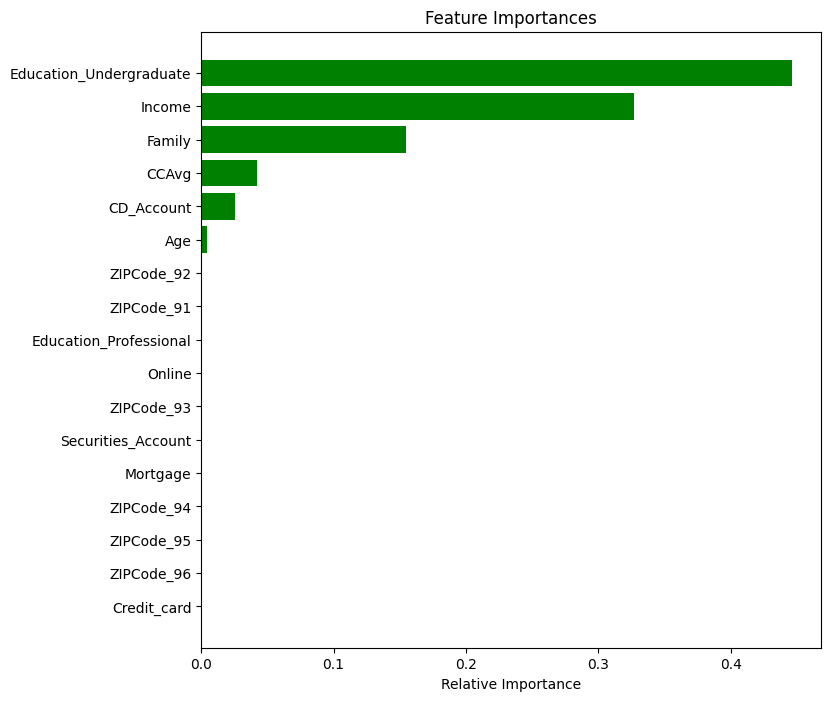

In [133]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [indep_vars[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can see that after tuning the decision tree, Education_Undergraduate, Income, Family, and CCAvg emerge as the key features in determining customers' loan acceptance, while other variables exhibit no significant importance.

**Checking performance on test data**

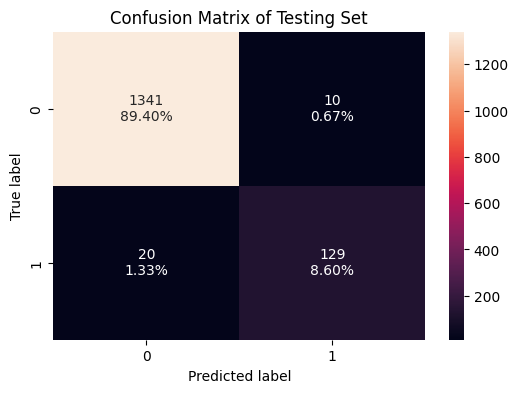

In [134]:
# create confusion matrix for test data
confusion_matrix_sklearn(estimator, X_test, y_test, seg='Testing')

In [135]:
# get the model performance on test data
dt_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
dt_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


#### Cost-Complexity Pruning

In [136]:
#defining the classifier
clf = DecisionTreeClassifier(random_state= 1)

#defining the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)

#Extracting the ccp_aplhas and impurities from the path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#displaying the ccp_alphas VS the impurities to prove that as the alphase increas the impurities increase
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


* we can observe  that as the alphase value increas the impurities increase Beascuse the model becomes more simpler.
*
The last alpha in ccp_alphas prunes the entire tree, leaving only one node in clfs[-1]

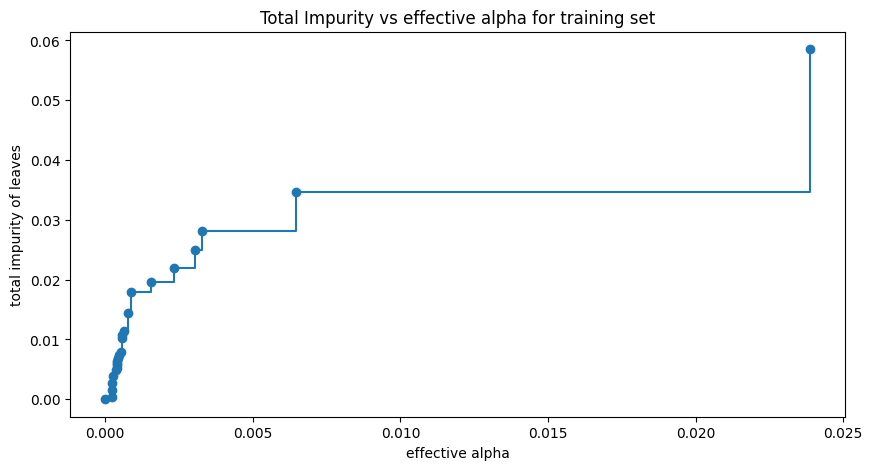

In [137]:
# plot the alphas VS the impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    ccp_alphas[:-1],
    impurities[:-1],
    marker = "o",
    drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

It is noticed that the impurities show a distinct peak around alpha ≈ 0.005

Next step is to start training the decision tree using the effective alphas and observe how the tree depth vary with alpha

In [140]:
# fit decision tree on training data using effective alpha values
clfs = []
for alpha in ccp_alphas:
  clf = DecisionTreeClassifier(
      random_state = 1,
      ccp_alpha = alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

print(
    f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}"
    )

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


We will Remove the last elements in clfs and CCP_alphas as they reflect the smallest tree (one node) and proceed with the visualtization of the nodes and depth (i.e tree complexity) as alpha varies



In [86]:
# remove the last elements in clfs and CCP_alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

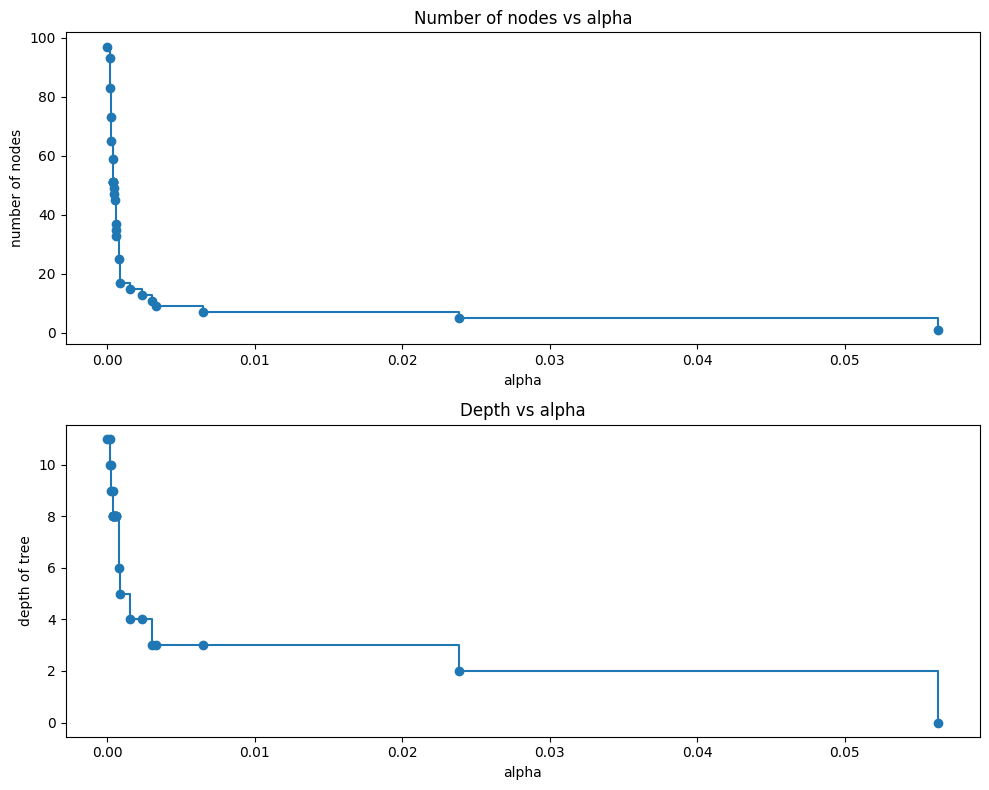

In [141]:
# To create a list of the tree nodes and depth
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# To visulize the nodes and depth vs alphas
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(
    ccp_alphas,
    node_counts,
    marker="o",
    drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas,
           depth,
           marker="o",
           drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* We can see as aplha values increase, number of nodes and depth of tree decrease.

**Recall vs alpha for training and testing sets**

 Now we will observe how the Model recall values at varying alphas for the training and test sets

In [142]:
#derive the recall values for all clf for the train set
recall_train = []
for clf in clfs:
  pred_train = clf.predict(X_train)
  values_train = recall_score(y_train, pred_train)
  recall_train.append(values_train)

In [143]:
#derive the recall values for all cls for the test set
recall_test = []
for clf in clfs:
  pred_test = clf.predict(X_test)
  values_test = recall_score(y_test, pred_test)
  recall_test.append(values_test)

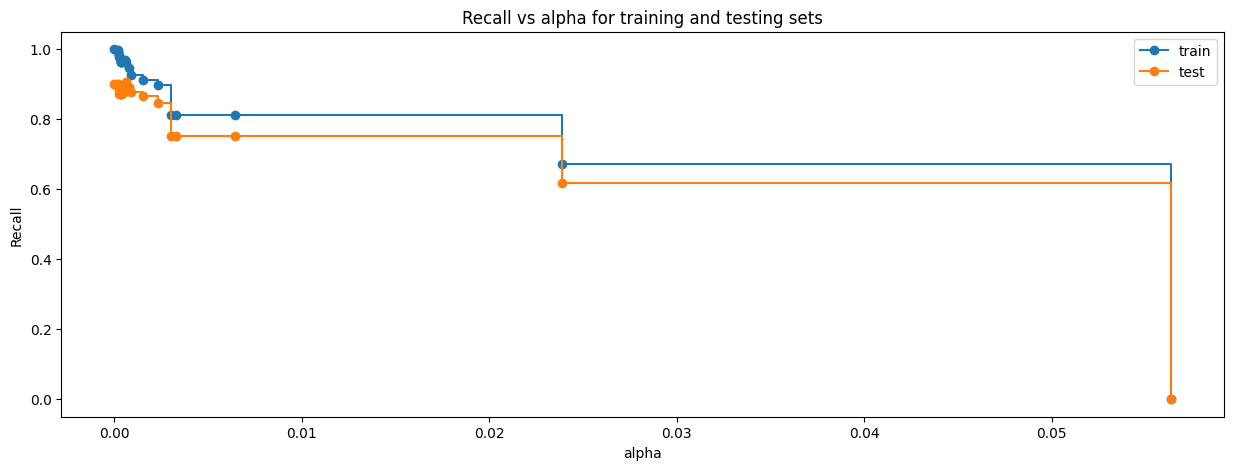

In [144]:
#plotting the recall scores for test and training sets VS Alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post"
    )
ax.plot(
    ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post"
    )
ax.legend()
plt.show()

* we are interested in an area of graph that recall score of training set as high as possible while the recall score of the test data be as close as possible to the train set point. **alpha value that will give us the optimum model performance is definitely less than 0.005**

In [145]:
# To return index of the highest recall value
index_best_model = np.argmax(recall_test)
# get the best model
best_model = clfs[index_best_model]
print(best_model)
print("+" * 80)
print(
    f''' The recall value giving the best predictibility model is: {recall_test[index_best_model]}
"The best alpha value is: {ccp_alphas[index_best_model]}"'''
)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 The recall value giving the best predictibility model is: 0.9060402684563759
"The best alpha value is: 0.0006209286209286216"


#### Decision Tree Post pruning

In [148]:
# adding the correct ccp_alpha value with class weights
estimator2 = DecisionTreeClassifier(
    ccp_alpha = ccp_alphas[index_best_model],
    class_weight = {0:0.15, 1:0.85},
    random_state= 1
)

In [149]:
# To fit the model with the best alpha on trainginf data
estimator2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Checking performance on training and testing data**

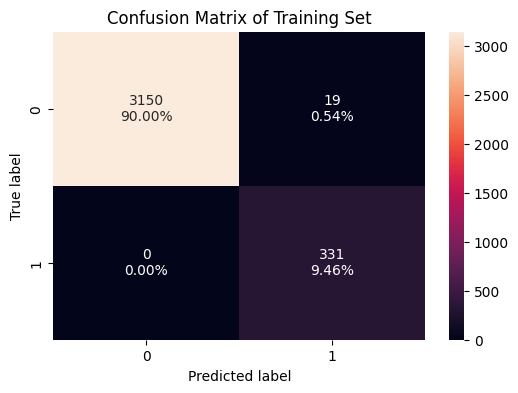

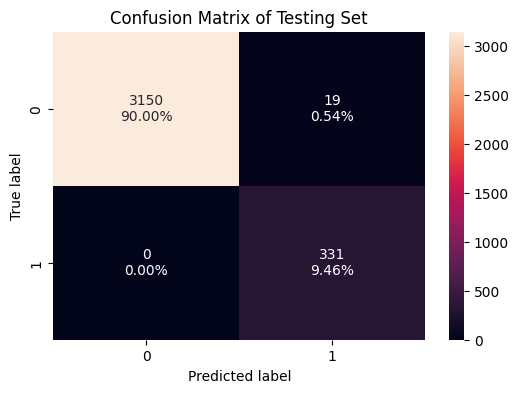

In [150]:
#create confusion matrix for train data
confusion_matrix_sklearn(estimator2, X_train, y_train , seg='Training')

#create confusion matrix for test data
confusion_matrix_sklearn(estimator2, X_train, y_train , seg='Testing')

In [151]:
#check the model performance on train data
dt_tune_post_train = model_performance_classification_sklearn(
    estimator2, X_train, y_train
    )
dt_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.994571,1.0,0.945714,0.9721


In [152]:
# Check the model performance on test data
dt_tune_post_test = model_performance_classification_sklearn(
    estimator2, X_test, y_test
    )
dt_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.885906,0.897959,0.891892


The Recall on train data sets is 1.0 which raises the suspicion of an overfitting model, the recall of the test dataset is 0.88 which is still better than estimator model.  we will derive the tree, decision table and feature importantce for this model

**Visualizing the Decision Tree**

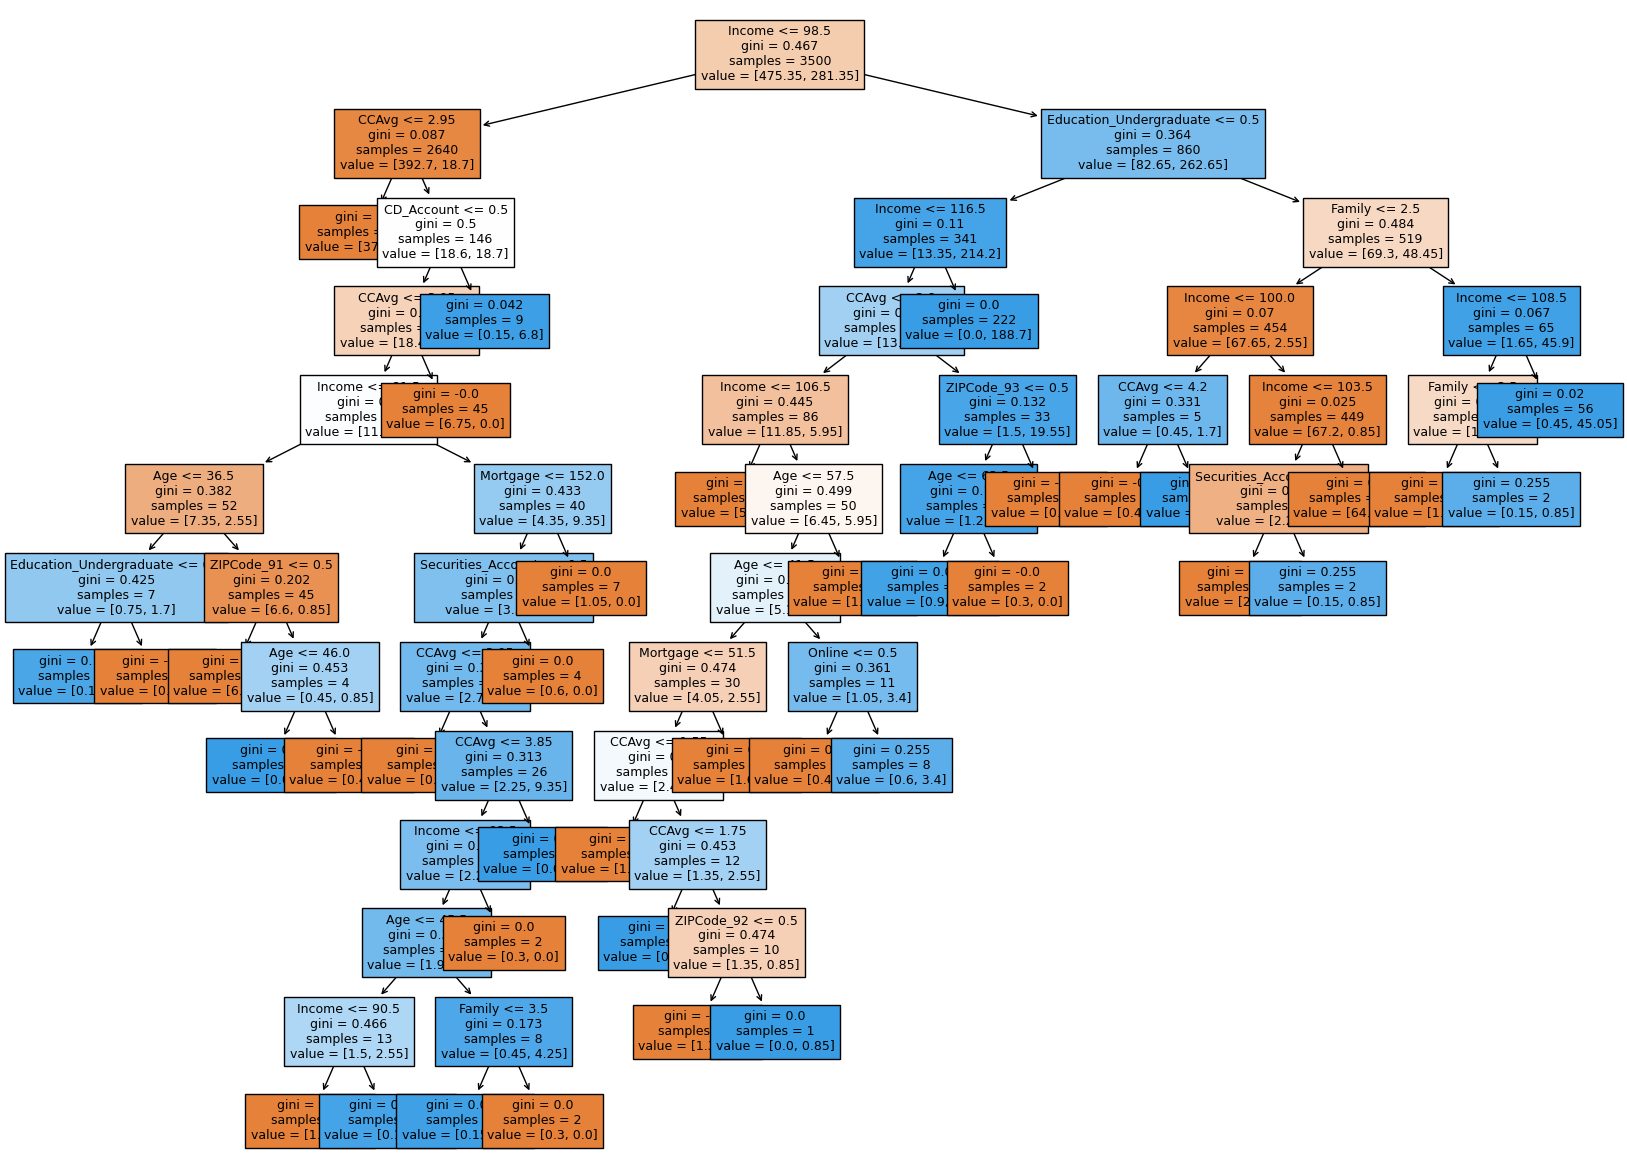

In [153]:
plt.figure(figsize=(20, 15))
out = tree.plot_tree(
    estimator2,
    feature_names = indep_vars,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [154]:
 # Text report showing the rules of a decision tree

print(tree.export_text(
    estimator2,
    feature_names = indep_vars,
    show_weights = True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <=

In [155]:
# To identify the importance of features in the tree building
print(
    pd.DataFrame(
        estimator2.feature_importances_,
        columns = ["Important"],
        index = X_train.columns
    ).sort_values(by="Important", ascending=False)
)

                         Important
Income                    0.602209
Family                    0.144151
Education_Undergraduate   0.127332
CCAvg                     0.084681
Age                       0.011925
CD_Account                0.011166
Mortgage                  0.004929
Securities_Account        0.004788
ZIPCode_92                0.002996
ZIPCode_91                0.002635
Online                    0.001679
ZIPCode_93                0.001508
ZIPCode_94                0.000000
ZIPCode_95                0.000000
ZIPCode_96                0.000000
Education_Professional    0.000000
Credit_card               0.000000


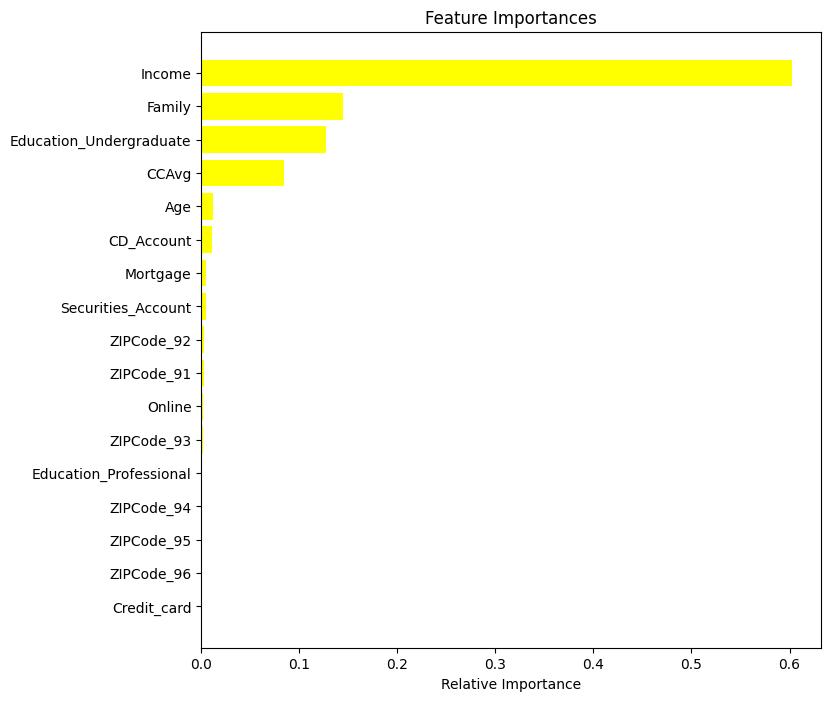

In [156]:
importances = estimator2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="yellow", align="center")
plt.yticks(range(len(indices)), [indep_vars[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

We can see that after post pruning the decision tree, Income becomes the most important feasure of explaing acceptance of personal loan followed by Family, Education_Undergraduate, while other variables exhibit no significant importance.

## Model Comparison and Final Model Selection

In [160]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dt_perf_train.T,
     dt_tune_perf_train.T,
     dt_tune_post_train.T],
     axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn",
                                "Decision Tree (Pre-Pruning)",
                                "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.994571
Recall,1.0,0.927492,1.000000
Precision,1.0,0.968454,0.945714
F1,1.0,0.947531,0.972100


In [161]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dt_perf_test.T,
     dt_tune_perf_test.T,
     dt_tune_post_test.T],
     axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn",
                                "Decision Tree (Pre-Pruning)",
                                "Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,0.980000,0.978667
Recall,0.899329,0.865772,0.885906
Precision,0.911565,0.928058,0.897959
F1,0.905405,0.895833,0.891892


 The **Decision tree model with post pruning** appears to be providing best **Test Recall of 89%** with Test Accuracy of 98%.
 The decision tree-post pruning performs well on both train and test datasets, it suggests that the model has learned the underlying patterns in the data accurately and can generalize well to unseen data.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

#### Summary

I examined the "Potential Loan marketing data" through various techniques, employing a Decision Tree Classifier to construct a predictive model. This model aids in predicting whether a liability customer will opt for a personal loan. Multiple decision trees were created and visualized to assess model performance. Essential features were identified by analyzing their frequency in the decision-making process of the trees. Hyperparameter tuning and pruning techniques were implemented to address model overfitting, resulting in the development of an optimized model.

#### Conculations

* The key predictors for potential loan customers are income, education, family, and credit card usage.
* Costumers with separate securities and CD accounts are more inclined to obtain a personal loan.
* Moreover, customers utilizing the bank's online facilities are more likely to secure a personal loan compared to those who don't use online services.
* In our model selection process, we emphasized the significance of hyperparameters and pruning to effectively reduce overfitting.

#### Recommendations

* Prior to extending a personal loan offer, it is advisable for the marketing team to thoroughly examine the profiles of potential customers.
* The top 3 features stated in the features list  need to be considered as the target customer profile for a personal loan campaign.
* According to the pot-pruning decision tree model, income stands out as the most crucial factor. If a customer's annual income is below 98.5K, there is a significant likelihood that the customer won't have a personal loan.
* From the model, those customers with an income greater than 98.5 and with an education level greater than or equal to 3 (Advanced/Professional) and family size of three and four were most likely to have a personal loan. The bank could tailor its marketing strategies and loan offers to attract and engage customers with such profiles.
* Observations revealed that customers who engage with online facilities are more prone to having personal loans. recomment to improve the site's user-friendliness and actively promote online services to customers who haven't utilized them.
 * Simplify the personal loan application process to enhance overall user experience.
* In finance studies, the weight of False Negatives (FN) leading to total losses is considered more significant than that of False Positives (FP). Consequently, the primary goal is to maximize Recall, given its utmost relevance in this context.
* The goal of the marketing team or sales team should be not to miss an opportunity, meaning, there should be minimal chance of predicting a customer would not purchase a personal loan, actually would have borrowed one. This is achieved by minimizing false negatives of our prediction.
* Among different decision tree models, the Decision Tree has the best recall score, and pre-pruning has the lowest. Since using the full decision tree is computationally demanding, choosing the simpler and faster post-pruning model could be a good option.